In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

In [49]:
model = models.vgg19(weights='DEFAULT')

In [118]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()

        self.chosen_features = [0,5,10,19,28]
        self.chosen_features = [1,6,11,20,29]
        self.model = models.vgg19(weights='DEFAULT').features[:30]

    def forward(self, x):
        features = []

        for layer_num, layer in enumerate(self.model):
            x = layer(x)

            if layer_num in self.chosen_features:
                features.append(x)

        return features

def load_image(image_name):
    image = Image.open(image_name)
    image = image.convert('RGB')
    image = loader(image).unsqueeze(0)
    return image.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_size = 356

loader = transforms.Compose(
    [
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(),
    ]
)

original_img = load_image("content.png")
style_img = load_image("style.jpg")

model = VGG().to(device).eval()

#generated= torch.randn(original_img.shape, device=device, requires_grad=True) # Noise
generated = original_img.clone().requires_grad_(True) # Content image

# Hyperparameters
total_steps = 6000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)

for step in range(total_steps):
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    style_loss = original_loss = 0

    for gen_feature, orig_feature, style_feature in zip(generated_features, original_img_features, style_features):
        batch_size, channel, height, width = gen_feature.shape
        original_loss += torch.mean((gen_feature - orig_feature) ** 2)

        G = gen_feature.view(channel, height*width).mm(gen_feature.view(channel, height*width).t())

        A = style_feature.view(channel, height*width).mm(style_feature.view(channel, height*width).t())

        style_loss += torch.mean((G - A) ** 2)

    total_loss = alpha*original_loss + beta*style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(total_loss)
        save_image(generated, "generated.jpg") # file type depends on content image file type
    

tensor(778763., grad_fn=<AddBackward0>)
tensor(49854.1016, grad_fn=<AddBackward0>)
tensor(30527.1777, grad_fn=<AddBackward0>)
tensor(17739.5898, grad_fn=<AddBackward0>)
tensor(9163.8379, grad_fn=<AddBackward0>)
tensor(5077.4072, grad_fn=<AddBackward0>)
tensor(3626.0515, grad_fn=<AddBackward0>)
tensor(3044.4390, grad_fn=<AddBackward0>)
tensor(2699.3330, grad_fn=<AddBackward0>)
tensor(2443.0203, grad_fn=<AddBackward0>)
tensor(2234.5176, grad_fn=<AddBackward0>)
tensor(2056.9338, grad_fn=<AddBackward0>)
tensor(1901.9417, grad_fn=<AddBackward0>)
tensor(1764.6436, grad_fn=<AddBackward0>)
tensor(1642.1543, grad_fn=<AddBackward0>)
tensor(1531.8850, grad_fn=<AddBackward0>)
tensor(1432.1329, grad_fn=<AddBackward0>)


KeyboardInterrupt: 

In [279]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()

        #self.chosen_features = [0,5,10,19,28]
        self.chosen_features = [1,6,11,20,29]
        self.model = models.vgg19(weights='DEFAULT').features[:30]

    def forward(self, x):
        features = []

        for layer_num, layer in enumerate(self.model):
            x = layer(x)

            if layer_num in self.chosen_features:
                features.append(x)

        return features

def load_image(image_name):
    image = Image.open(image_name)
    image = image.convert('RGB')
    image = loader(image).unsqueeze(0)
    return image.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_size = 356

loader = transforms.Compose(
    [
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor(),
    ]
)

original_img = load_image("content.png")
style_img = load_image("style.jpg")

model = VGG().to(device).eval()

#generated= torch.randn(original_img.shape, device=device, requires_grad=True) # Noise
generated = original_img.clone().requires_grad_(True) # Content image

# Hyperparameters
total_steps = 6000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)


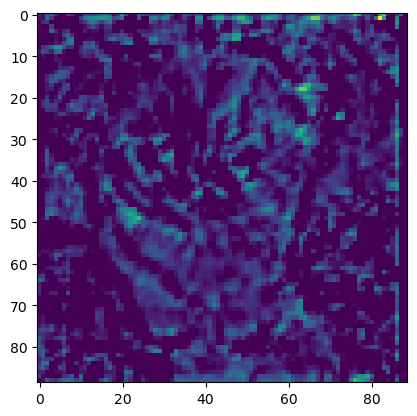

In [278]:
plt.imshow(original_img_features[2][0][67].detach().numpy())

In [221]:
model

VGG(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding